In [1]:
import pandas as pd
df=pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

Data Cleaning

In [2]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [6]:
df=df.sort_values("Date").reset_index(drop=True)

In [7]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2019-01-07,15987,9962,407,21223,3715,NaN
1,2019-01-08,19950,12601,459,25864,5754,1.0
2,2019-01-09,3761,4682,0,5936,0,0.0
3,2019-01-10,15028,12441,421,24365,0,1.0
4,2019-01-11,18179,12743,337,24242,5251,1.0


In [15]:
df.dtypes

Date            datetime64[ns]
Local Route              int64
Light Rail             float64
Peak Service             int64
Rapid Route              int64
School                   int64
Other                  float64
dtype: object

In [8]:
df.isnull().sum()

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [9]:
(df==0).sum()

Date              0
Local Route       0
Light Rail        6
Peak Service    609
Rapid Route       1
School          901
Other           213
dtype: int64

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df.corr()

/tmp/ipykernel_246366/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month,Day,DayOfWeek,IsWeekend,Total
Local Route,1.000000,0.918795,0.944390,0.965122,0.852356,0.472877,0.078901,-0.030790,-0.025368,-0.341335,-0.434738,0.990457
Light Rail,0.918795,1.000000,0.879347,0.967736,0.685795,0.426106,0.191270,-0.034123,-0.025010,-0.246202,-0.320176,0.955443
Peak Service,0.944390,0.879347,1.000000,0.944997,0.728795,0.380760,0.038888,-0.037563,-0.033458,-0.373112,-0.426356,0.940254
Rapid Route,0.965122,0.967736,0.944997,1.000000,0.754290,0.382616,0.072906,-0.036937,-0.023125,-0.294303,-0.372673,0.986948
School,0.852356,0.685795,0.728795,0.754290,1.000000,0.430711,0.010016,-0.027282,-0.017836,-0.287524,-0.352640,0.837976
Other,0.472877,0.426106,0.380760,0.382616,0.430711,1.000000,0.407383,-0.034141,-0.035983,-0.133091,-0.201622,0.444682
Year,0.078901,0.191270,0.038888,0.072906,0.010016,0.407383,1.000000,-0.144018,-0.040345,0.002263,0.002683,0.091515
Month,-0.030790,-0.034123,-0.037563,-0.036937,-0.027282,-0.034141,-0.144018,1.000000,0.017394,0.003877,0.002324,-0.034508
Day,-0.025368,-0.025010,-0.033458,-0.023125,-0.017836,-0.035983,-0.040345,0.017394,1.000000,0.000920,0.002319,-0.024555
DayOfWeek,-0.341335,-0.246202,-0.373112,-0.294303,-0.287524,-0.133091,0.002263,0.003877,0.000920,1.000000,0.790837,-0.312545


EDA

In [22]:
df["Weekday"] = df["Date"].dt.day_name()
df["isWeekend"] = df["Weekday"].isin(["Saturday","Sunday"])

In [23]:
weekday_mean = df.groupby("isWeekend")["Total"].mean()
print(weekday_mean)

isWeekend
False    36818.019006
True     20920.414545
Name: Total, dtype: float64


In [24]:
df.groupby("IsWeekend")[["Local Route","Light Rail",
                         "Peak Service","Rapid Route","School"]].mean()

,Local Route,Light Rail,Peak Service,Rapid Route,School
IsWeekend,,,,,
0,11578.161550,7874.477339,221.887427,14184.861111,2910.377193
1,5695.947273,5506.510909,74.354545,8648.300000,965.587273


Insight 1:
Passenger count drops sharply on weekends, with weekday ridership almost twice as high as weekends.

In [25]:
year_mean = df.groupby("Year")["Total"].mean()
print(year_mean)

Year
2019    44471.625000
2020    26327.237705
2021    25499.750685
2022    29679.000000
2023    37112.791781
2024    37979.183150
Name: Total, dtype: float64


Insight 2:
Daily ridership dropped sharply during COVID years and has still not fully returned to pre-COVID levels.

In [26]:
service_share = df.groupby("Year")[["Local Route","Light Rail",
                                    "Peak Service","Rapid Route","School"]].sum()
share_pct = service_share.div(service_share.sum(axis=1), axis=0) * 100
print(share_pct.round(1))

      Local Route  Light Rail  Peak Service  Rapid Route  School
Year                                                            
2019         29.6        21.8           0.6         41.5     6.5
2020         31.1        20.8           0.5         39.0     8.5
2021         32.4        21.3           0.5         37.8     8.0
2022         30.9        22.8           0.5         38.3     7.5
2023         29.8        23.6           0.6         39.4     6.6
2024         30.8        22.9           0.6         38.9     6.9


Insight 3:
Rapid Route consistently carries the largest share of passengers each year, while School and Peak Services contribute the least.

In [27]:
school_by_month = df.groupby(df["Date"].dt.month)["School"].mean()
print(school_by_month.round(1))

Date
1     1005.0
2     3511.5
3     3084.6
4     1687.5
5     2689.6
6     2540.1
7     2477.1
8     2556.9
9     2099.5
10    2791.9
11    2821.0
12    1042.4
Name: School, dtype: float64


Insight 4:
School service peaks during school months and drops sharply in holiday months like January and December.

In [30]:
df[["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]].describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


**Forecasting**

-Creating Features
-Train test split
-Train multi-output Random Forest

In [44]:
target_cols = ["Local Route","Light Rail","Peak Service","Rapid Route","School"]

data = df.copy()
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["dayofweek"] = data["Date"].dt.weekday   # 0=Mon,6=Sun
data["dayofyear"] = data["Date"].dt.dayofyear

# cyclic encoding for annual seasonality
data["sin_doy"] = np.sin(2*np.pi*data["dayofyear"]/365.25)
data["cos_doy"] = np.cos(2*np.pi*data["dayofyear"]/365.25)

lags = [1,7,14]
for col in target_cols:
    for lag in lags:
        data[f"{col}_lag{lag}"] = data[col].shift(lag)

# drop rows where lag features are NaN
data_model = data.dropna().reset_index(drop=True)

In [49]:
train = data_model[data_model["Date"] < "2024-01-01"]
test  = data_model[data_model["Date"] >= "2024-01-01"]

X_train = train.drop(columns=target_cols + ["Date","Total","Other","Weekday","IsWeekend"], errors="ignore")
X_test  = test.drop(columns=target_cols + ["Date","Total","Other","Weekday","IsWeekend"], errors="ignore")

# ensure only numeric features
X_train = X_train.select_dtypes(include=[np.number])
X_test  = X_test.select_dtypes(include=[np.number])

y_train = train[target_cols]
y_test  = test[target_cols]

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(
    n_estimators=300,   
    max_depth=12,       
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred, multioutput="raw_values")

for name, m in zip(target_cols, mae):
    print(name, "MAE:", round(m, 1))

Local Route MAE: 3211.1
Light Rail MAE: 1428.9
Peak Service MAE: 79.2
Rapid Route MAE: 2872.3
School MAE: 1395.2


**Compare the Random forest output with Naive baseline**

In [35]:
baseline_pred = test[[f"{col}_lag7" for col in target_cols]].to_numpy()
baseline_mae = mean_absolute_error(y_test, baseline_pred, multioutput="raw_values")

for name, m in zip(target_cols, baseline_mae):
    print(name, "Baseline MAE:", round(m, 1))

Local Route Baseline MAE: 5523.6
Light Rail Baseline MAE: 2576.8
Peak Service Baseline MAE: 138.2
Rapid Route Baseline MAE: 5373.0
School Baseline MAE: 2131.3


In [36]:
fi = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(fi)

Peak Service_lag1     0.198468
Day                   0.160385
Light Rail_lag1       0.139255
dayofweek             0.075787
DayOfWeek             0.073466
Local Route_lag1      0.047604
Rapid Route_lag1      0.045134
Year                  0.031526
Rapid Route_lag14     0.028222
School_lag1           0.026559
cos_doy               0.024689
Light Rail_lag7       0.017159
Rapid Route_lag7      0.016242
Light Rail_lag14      0.016155
Local Route_lag7      0.015119
dayofyear             0.014369
sin_doy               0.013423
School_lag7           0.012956
Peak Service_lag14    0.012822
Peak Service_lag7     0.011794
Local Route_lag14     0.010291
School_lag14          0.006601
Month                 0.001974
dtype: float64


Forecasting the next 7 days

In [37]:
from datetime import timedelta

last_date = df["Date"].max()
horizon = 14
future_dates = [last_date + timedelta(days=i) for i in range(1, horizon+1)]

data_future = data_model.copy()  

for dt in future_dates:
    
    row = {"Date": dt}
    data_future = pd.concat([data_future, pd.DataFrame([row])], ignore_index=True)
    idx = data_future.index[-1]
    
    d = data_future.loc[idx, "Date"]
    data_future.loc[idx, "Year"] = d.year
    data_future.loc[idx, "Month"] = d.month
    data_future.loc[idx, "dayofweek"] = d.weekday()
    data_future.loc[idx, "dayofyear"] = d.timetuple().tm_yday
    data_future.loc[idx, "sin_doy"] = np.sin(2*np.pi*data_future.loc[idx,"dayofyear"]/365.25)
    data_future.loc[idx, "cos_doy"] = np.cos(2*np.pi*data_future.loc[idx,"dayofyear"]/365.25)

    # update lag features from past rows (including newly predicted days)
    for col in target_cols:
        for lag in lags:
            lag_idx = idx - lag
            if lag_idx >= 0:
                data_future.loc[idx, f"{col}_lag{lag}"] = data_future.loc[lag_idx, col]

    # build feature vector
    X_new = data_future.loc[[idx], X_train.columns].fillna(X_train.mean())
    y_new = rf.predict(X_new)[0]

    # store predictions
    for col, val in zip(target_cols, y_new):
        data_future.loc[idx, col] = val

future_forecast = data_future[data_future["Date"].isin(future_dates)][["Date"] + target_cols]
print(future_forecast.head())

           Date   Local Route    Light Rail  Peak Service   Rapid Route  \
1887 2024-12-10  15722.785298  10740.288838    330.748965  19137.416716   
1888 2024-12-11  15682.231570  10775.249132    318.108376  18991.383506   
1889 2024-12-12  15257.699238  10498.718480    301.248342  18359.893853   
1890 2024-12-13  14830.815925  10174.295894    296.931872  17788.436498   
1891 2024-12-14   8488.698532   7645.045365    130.426989  11962.292921   

           School  
1887  4579.053359  
1888  4506.420561  
1889  4318.077057  
1890  4065.275677  
1891  1527.689906  


Plot Actual vs Predicted (for each service)

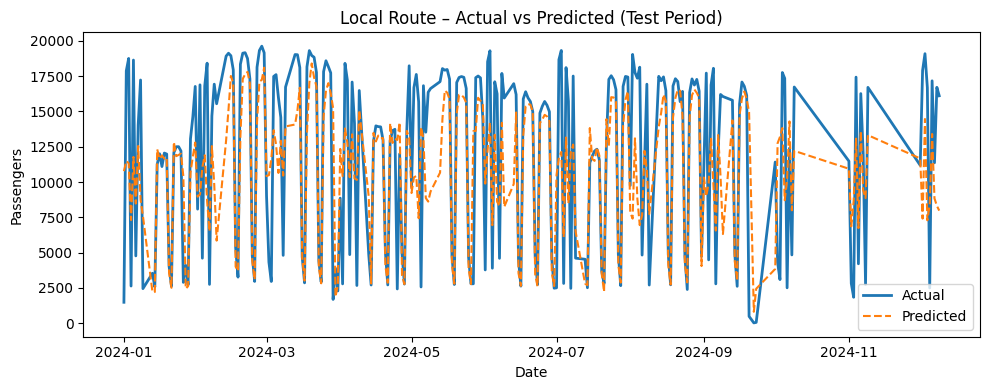

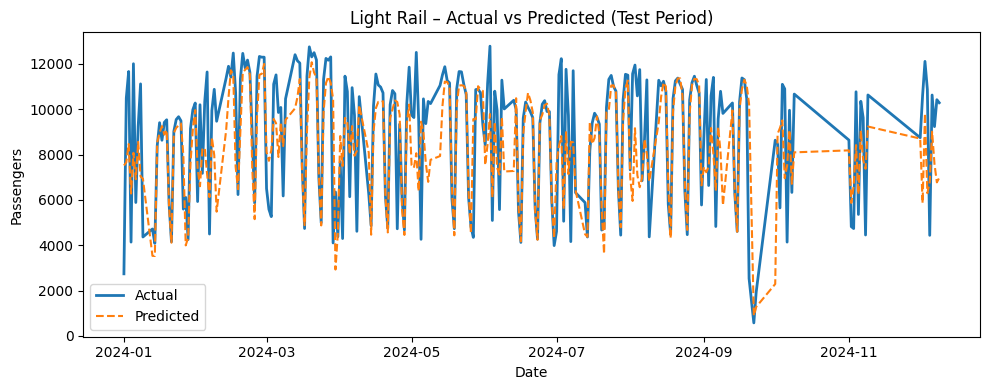

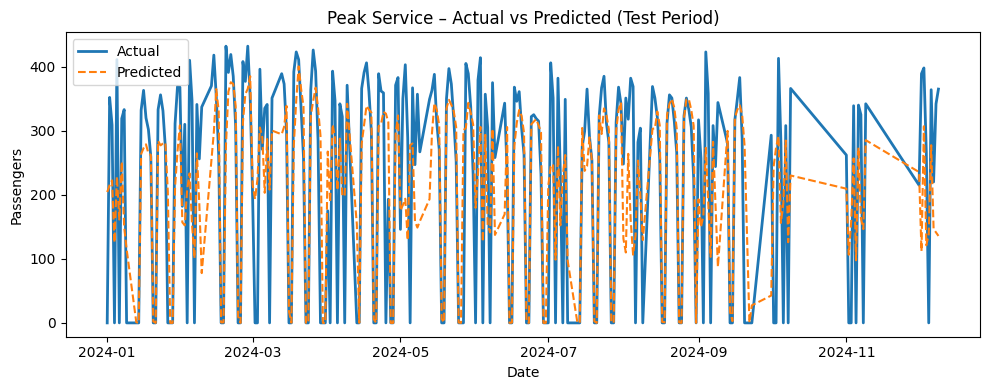

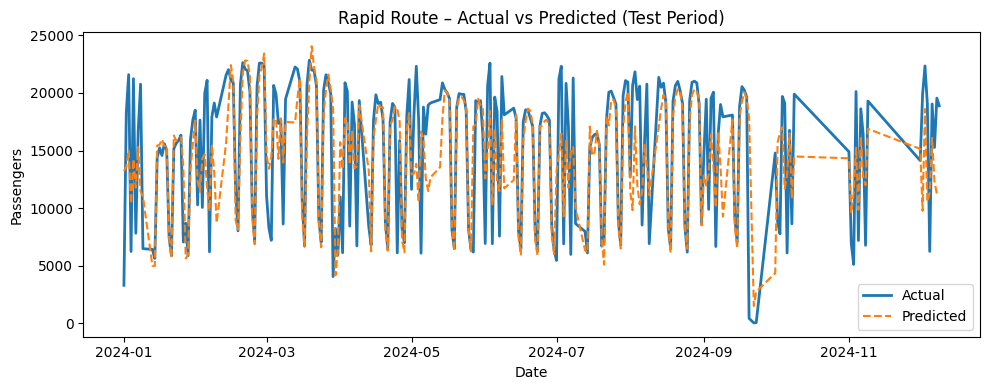

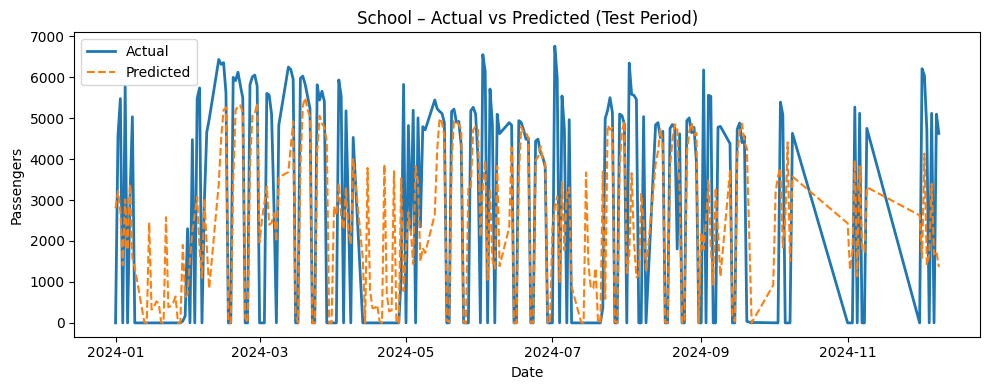

In [38]:
for service in target_cols:
    plt.figure(figsize=(10,4))
    plt.plot(test["Date"], y_test[service], label="Actual", linewidth=2)
    plt.plot(test["Date"], y_pred[:, target_cols.index(service)], 
             label="Predicted", linestyle="--")
    plt.title(f"{service} – Actual vs Predicted (Test Period)")
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.legend()
    plt.tight_layout()
    plt.show()


**Plot 60 days historical + forecast**


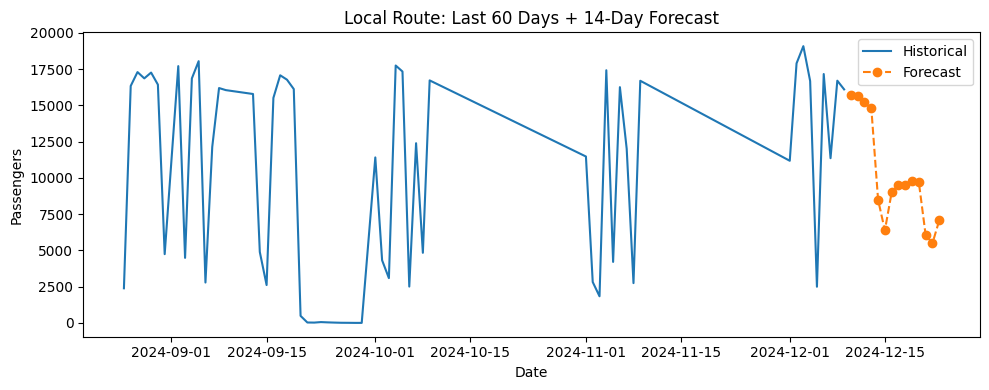

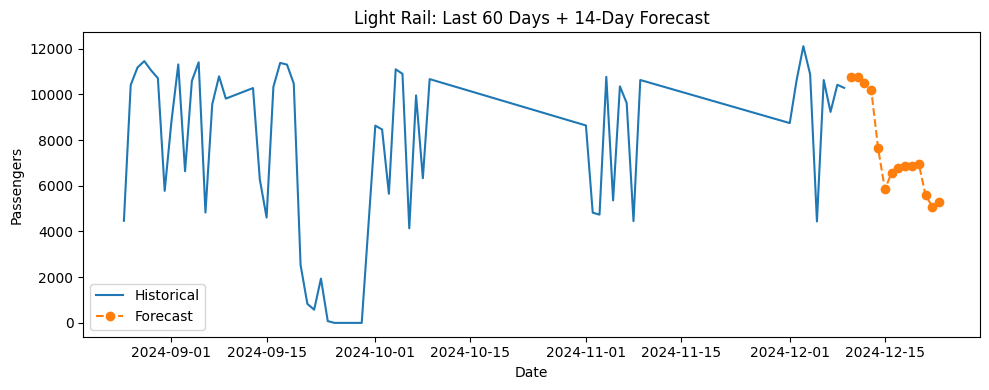

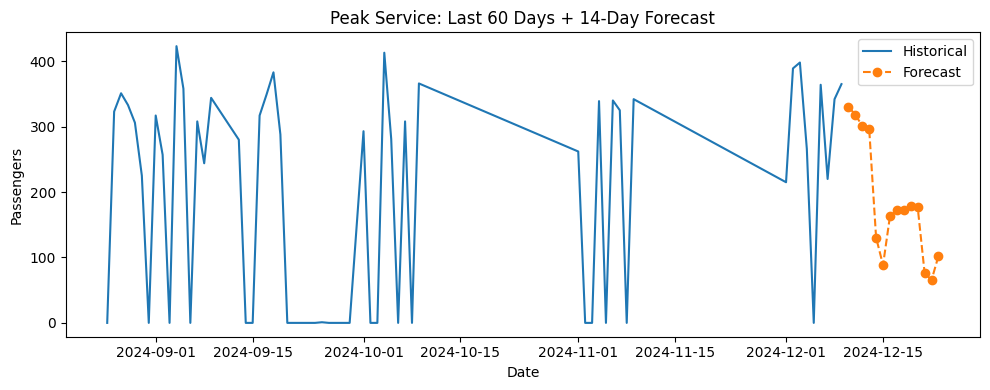

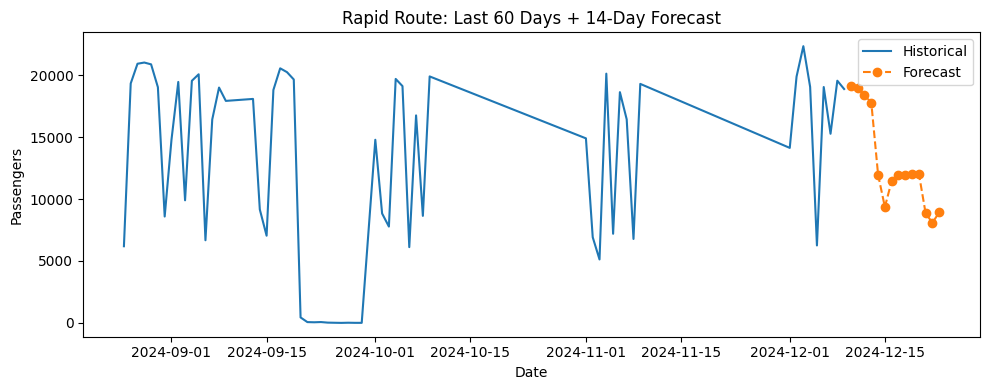

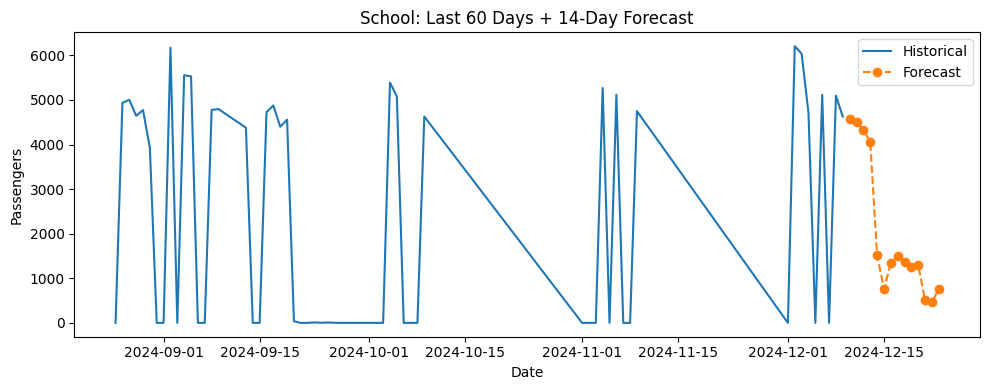

In [39]:
for service in target_cols:
    plt.figure(figsize=(10,4))
    
    # last 60 days of actual data
    hist = df[["Date", service]].tail(60)
    plt.plot(hist["Date"], hist[service], label="Historical")
    
    # future forecast
    plt.plot(future_forecast["Date"], future_forecast[service], 
             label="Forecast", marker="o", linestyle="--")
    
    plt.title(f"{service}: Last 60 Days + 14-Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.legend()
    plt.tight_layout()
    plt.show()